In [1]:
!jt -t chesterish -tfs 14 -fs 16 -cursw 2 -cursc r -cellw 90% -T -mathfs 110 -lineh 150
plot_theme = 'chesterish'

# Importación de Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import special as sp
from matplotlib import rc, rcParams
from jupyterthemes import jtplot
from cycler import cycler
dash_espacio = [5,5]

if plot_theme == 'grade3':
    principal_color='black'
else:
    principal_color='white'
    
def grafica_params(fscale=2.6, linea=3):
    jtplot.style(theme=plot_theme, context = 'talk', ticks = True, grid = False, fscale = fscale)
    mpl.rcParams['axes.prop_cycle'] =  cycler(color =[principal_color, 'deepskyblue'])
    plt.rcParams['text.usetex'] = True
    plt.rc('text', usetex=True)
    font = {'family': 'serif', 'weight': 'bold'}
    plt.rc('font', **font)
    plt.rc('lines', lw=linea)
    dash_espacio = [5,5]
    
grafica_params()

In [2]:
df = pd.read_csv('office_supplies.csv')
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values(by='Order Date')
df.index = df['Order Date']
df['Year'] = df['Order Date'].dt.year
df['Profit vs Quantity'] = df['Profit']/df['Quantity']
# dmin = df['Profit vs Quantity'].min()
# dmax = df['Profit vs Quantity'].max()
# df['Profit vs Quantity'] = (df['Profit vs Quantity'] - dmin)/(dmax - dmin)
df.head()

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Profit vs Quantity
Order Date,,,,,,,,,,,,,,
2014-01-03,CA-2014-103800,2014-01-03,Standard Class,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2014,2.7756
2014-01-04,CA-2014-112326,2014-01-04,Standard Class,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2014,-2.7435
2014-01-04,CA-2014-112326,2014-01-04,Standard Class,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,2014,-21.5916
2014-01-04,CA-2014-112326,2014-01-04,Standard Class,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,2014,1.4239
2014-01-05,CA-2014-141817,2014-01-05,Standard Class,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,2014,1.6280


In [3]:
print('df Shape', df.shape)
print('Not null Profit Df shape', df[pd.notnull(df['Profit'])].shape)

df Shape (9993, 14)
Not null Profit Df shape (8000, 14)


<ipython-input-4-c485ba5c15d8>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = pd.DataFrame(df.groupby(['Region','Category'])['Quantity', 'Sales','Profit'].sum()).reset_index()


<Figure size 1296x720 with 0 Axes>

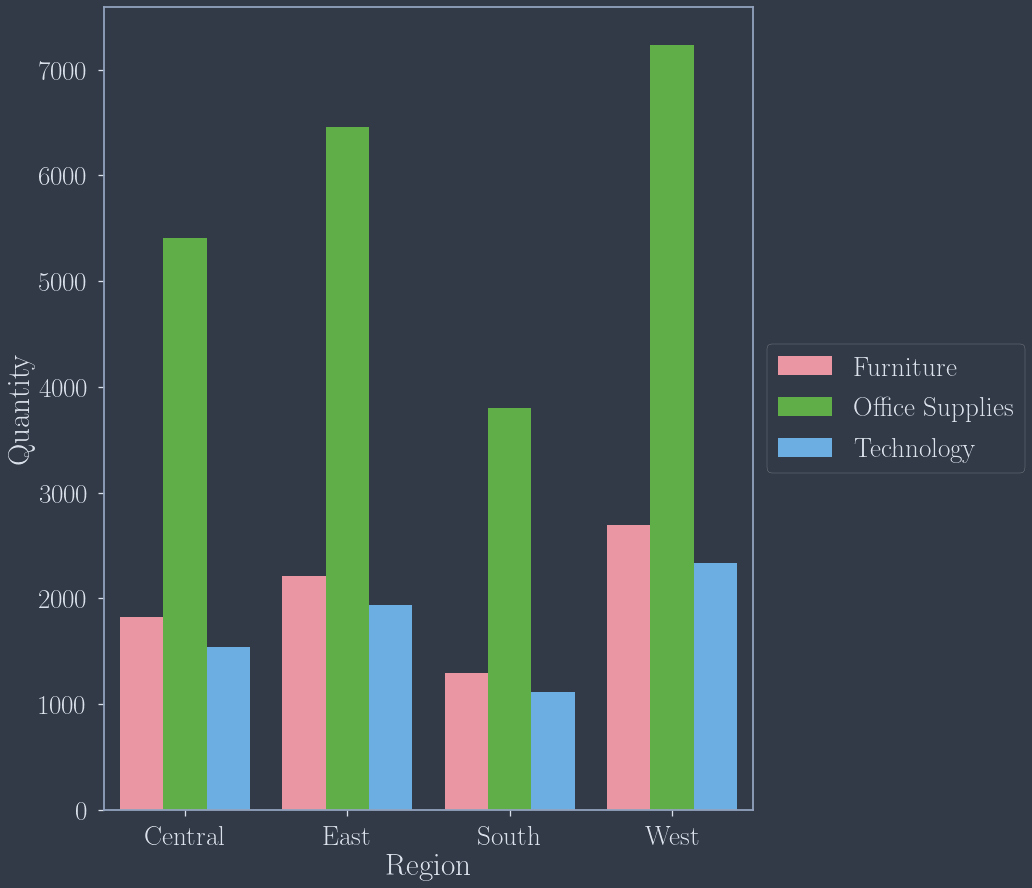

In [4]:
plt.figure(figsize=(18,10))
df1 = pd.DataFrame(df.groupby(['Region','Category'])['Quantity', 'Sales','Profit'].sum()).reset_index()                    
df1.head()
plt.figure(figsize=(15,13))
g = sns.barplot(x='Region',y='Quantity',hue='Category', data = df1)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('fig1.pdf', format='PDF')

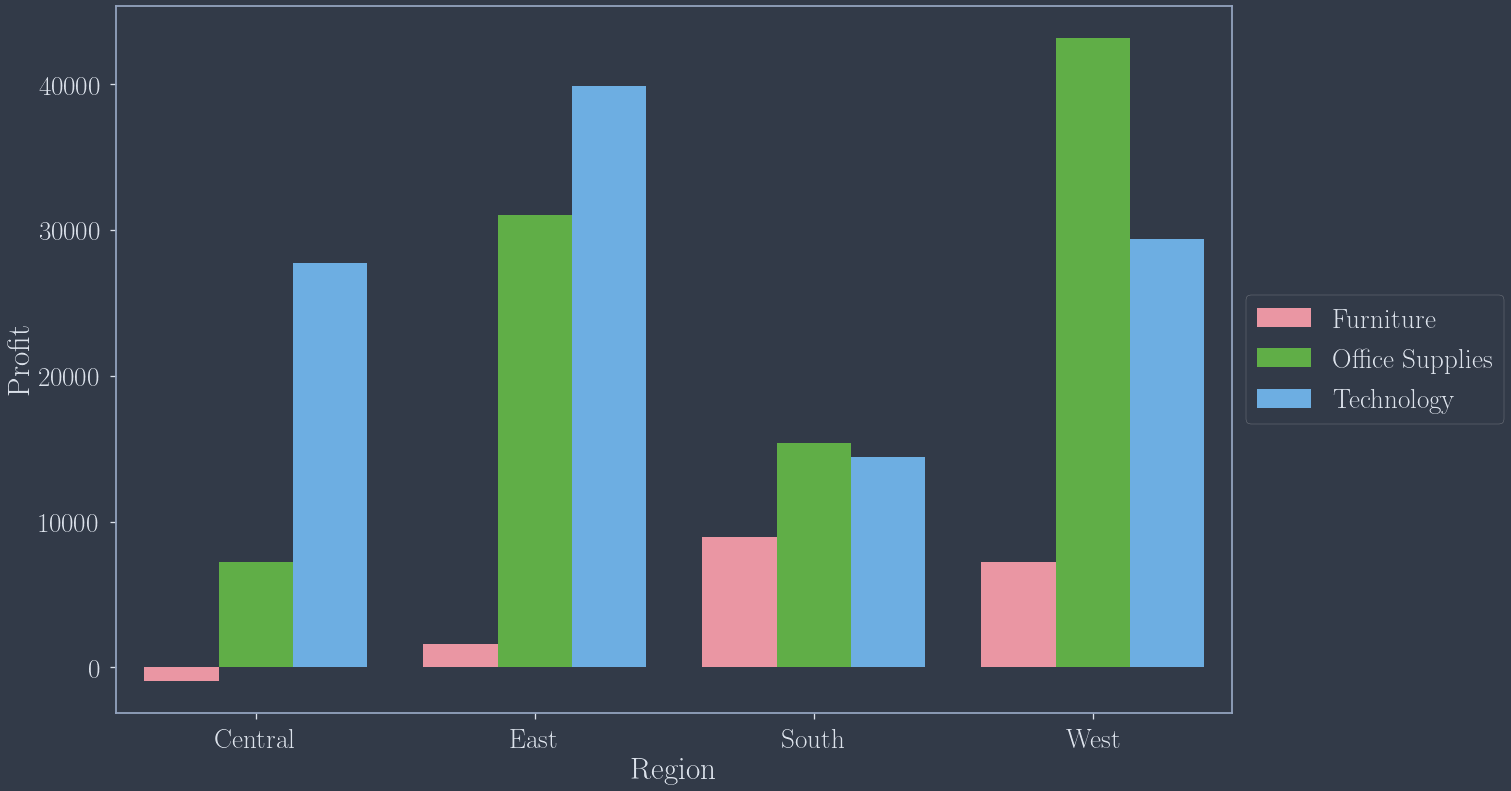

In [5]:
plt.figure(figsize=(20,13))
g = sns.barplot(x='Region',y='Profit',hue='Category', data = df1)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('fig2.pdf', format='PDF')

<ipython-input-6-6b1051bf46f8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1 = pd.DataFrame(df.groupby(['Region','Sub-Category'])['Quantity', 'Sales','Profit','Profit vs Quantity'].sum()).reset_index()


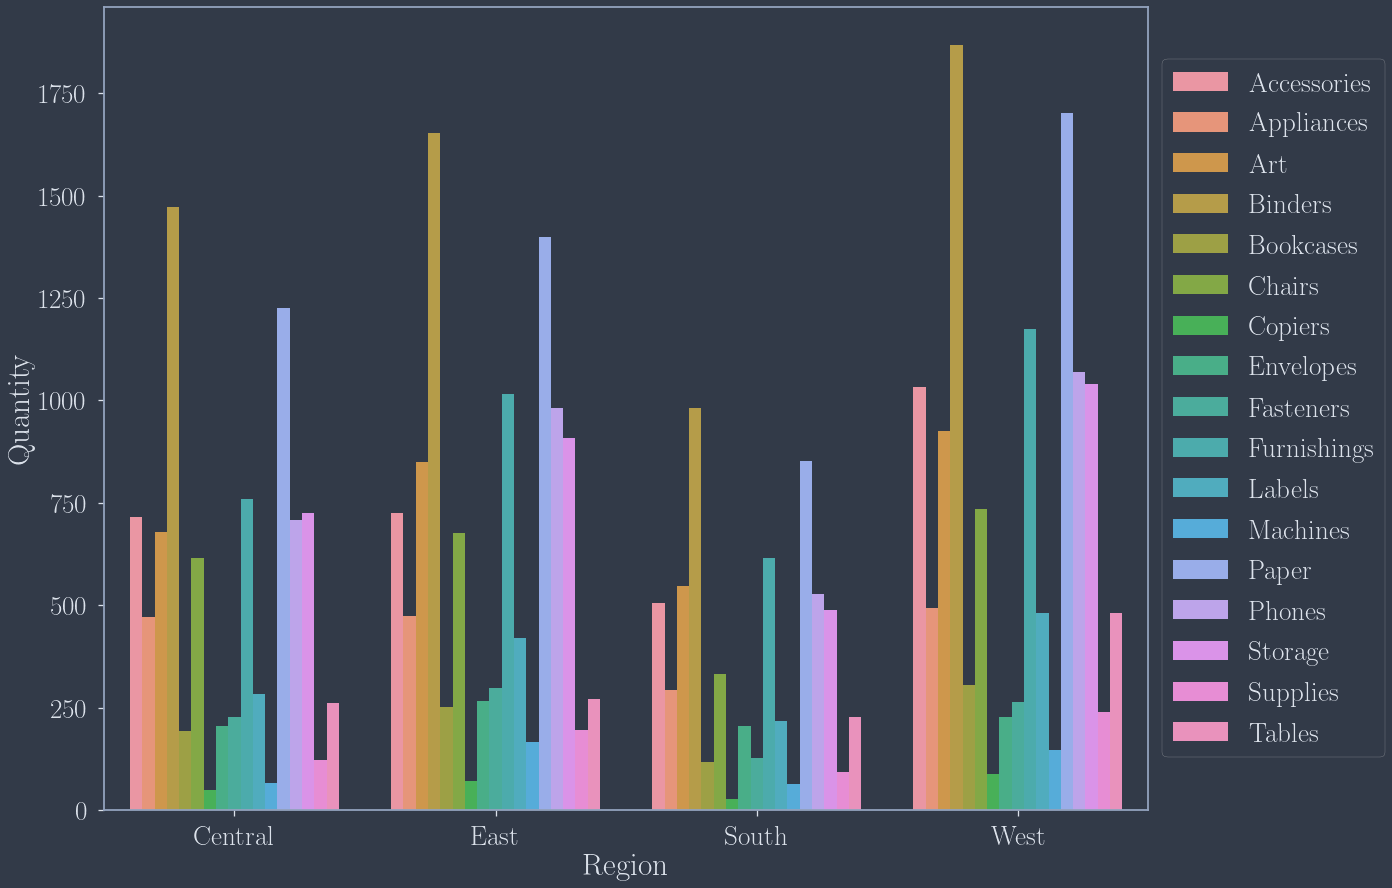

In [6]:
df1 = pd.DataFrame(df.groupby(['Region','Sub-Category'])['Quantity', 'Sales','Profit','Profit vs Quantity'].sum()).reset_index()                    
df1.head()
plt.figure(figsize=(20,13))
g = sns.barplot(x='Region',y='Quantity',hue='Sub-Category', data = df1)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('fig3')

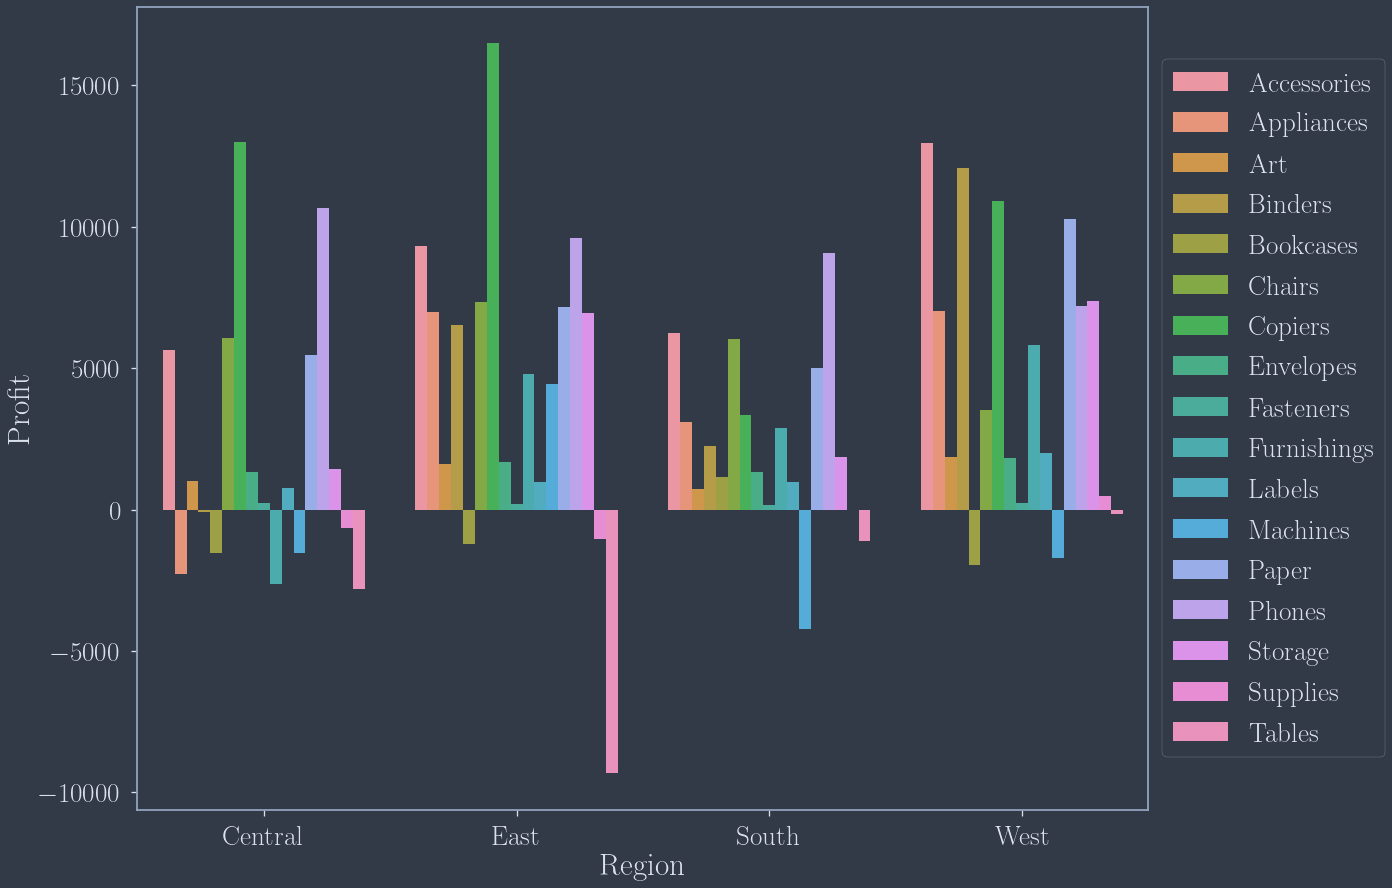

In [7]:
plt.figure(figsize=(20,13))
g = sns.barplot(x='Region',y='Profit',hue='Sub-Category', data = df1)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('fig4')

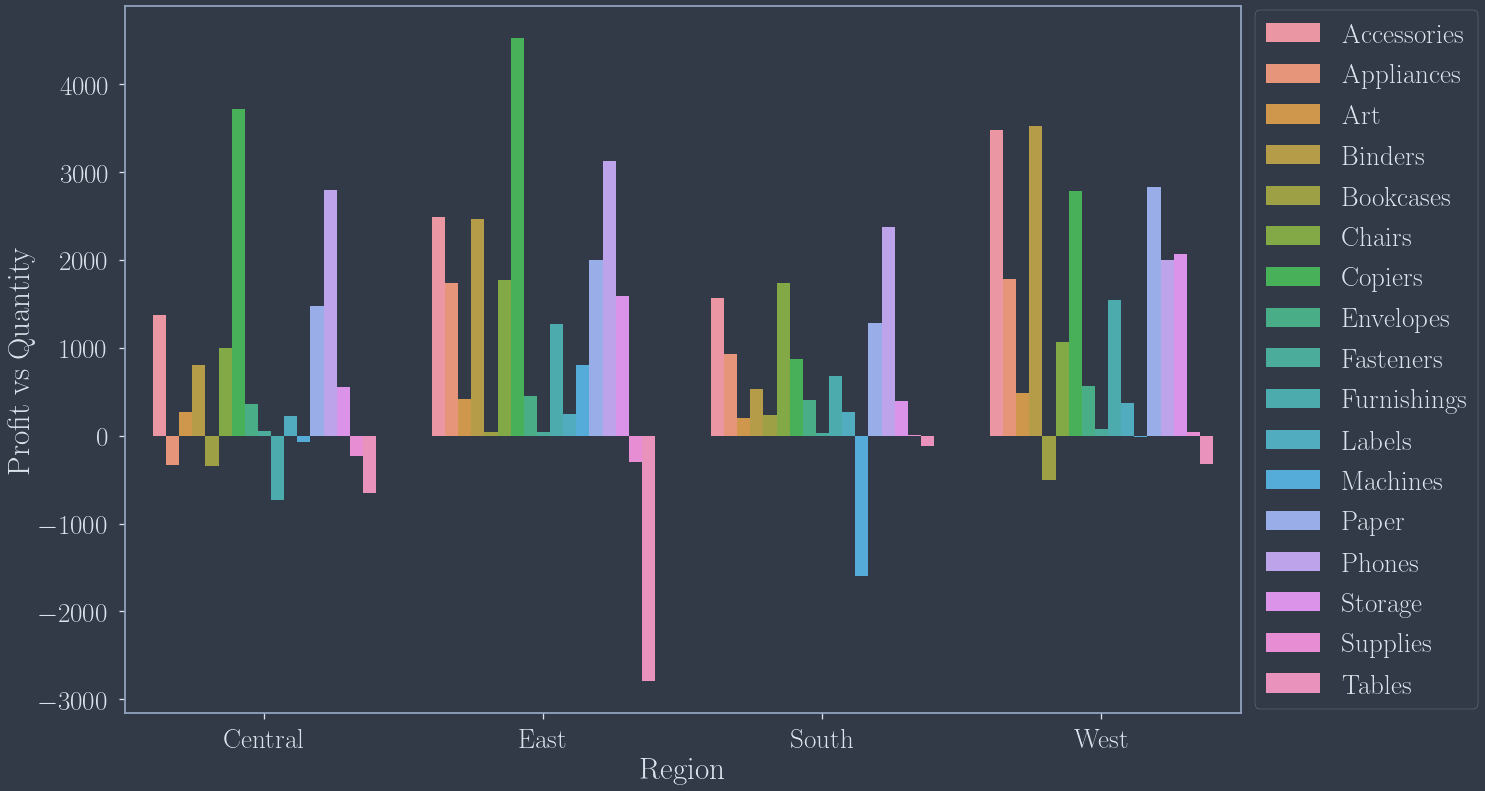

In [8]:
plt.figure(figsize=(20,13))
g = sns.barplot(x='Region',y='Profit vs Quantity', hue='Sub-Category', data = df1)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('fig5')

In [9]:
sub = pd.DataFrame(df[df['Profit']<-500].groupby(['Region','Sub-Category'])['Profit'].sum())
sub['Profit']
# sub[sub['Profit']<-2000]

Region   Sub-Category
Central  Appliances      -1947.2944
         Binders        -10934.1980
         Machines        -1869.9890
         Supplies         -786.0144
         Tables          -1092.2030
East     Binders          -760.9800
         Bookcases       -1665.0522
         Chairs           -630.8820
         Machines       -12329.3947
         Supplies        -1049.3406
         Tables          -1907.7700
South    Binders         -4641.3071
         Machines        -7168.0590
         Tables          -1656.0670
West     Bookcases        -786.7440
         Machines        -4338.2600
         Tables           -814.4832
Name: Profit, dtype: float64

<ipython-input-10-b5d9c885d62f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_peryear = pd.DataFrame(df.groupby(['Year','Region','Sub-Category'])['Quantity', 'Sales','Profit'].sum()).reset_index()


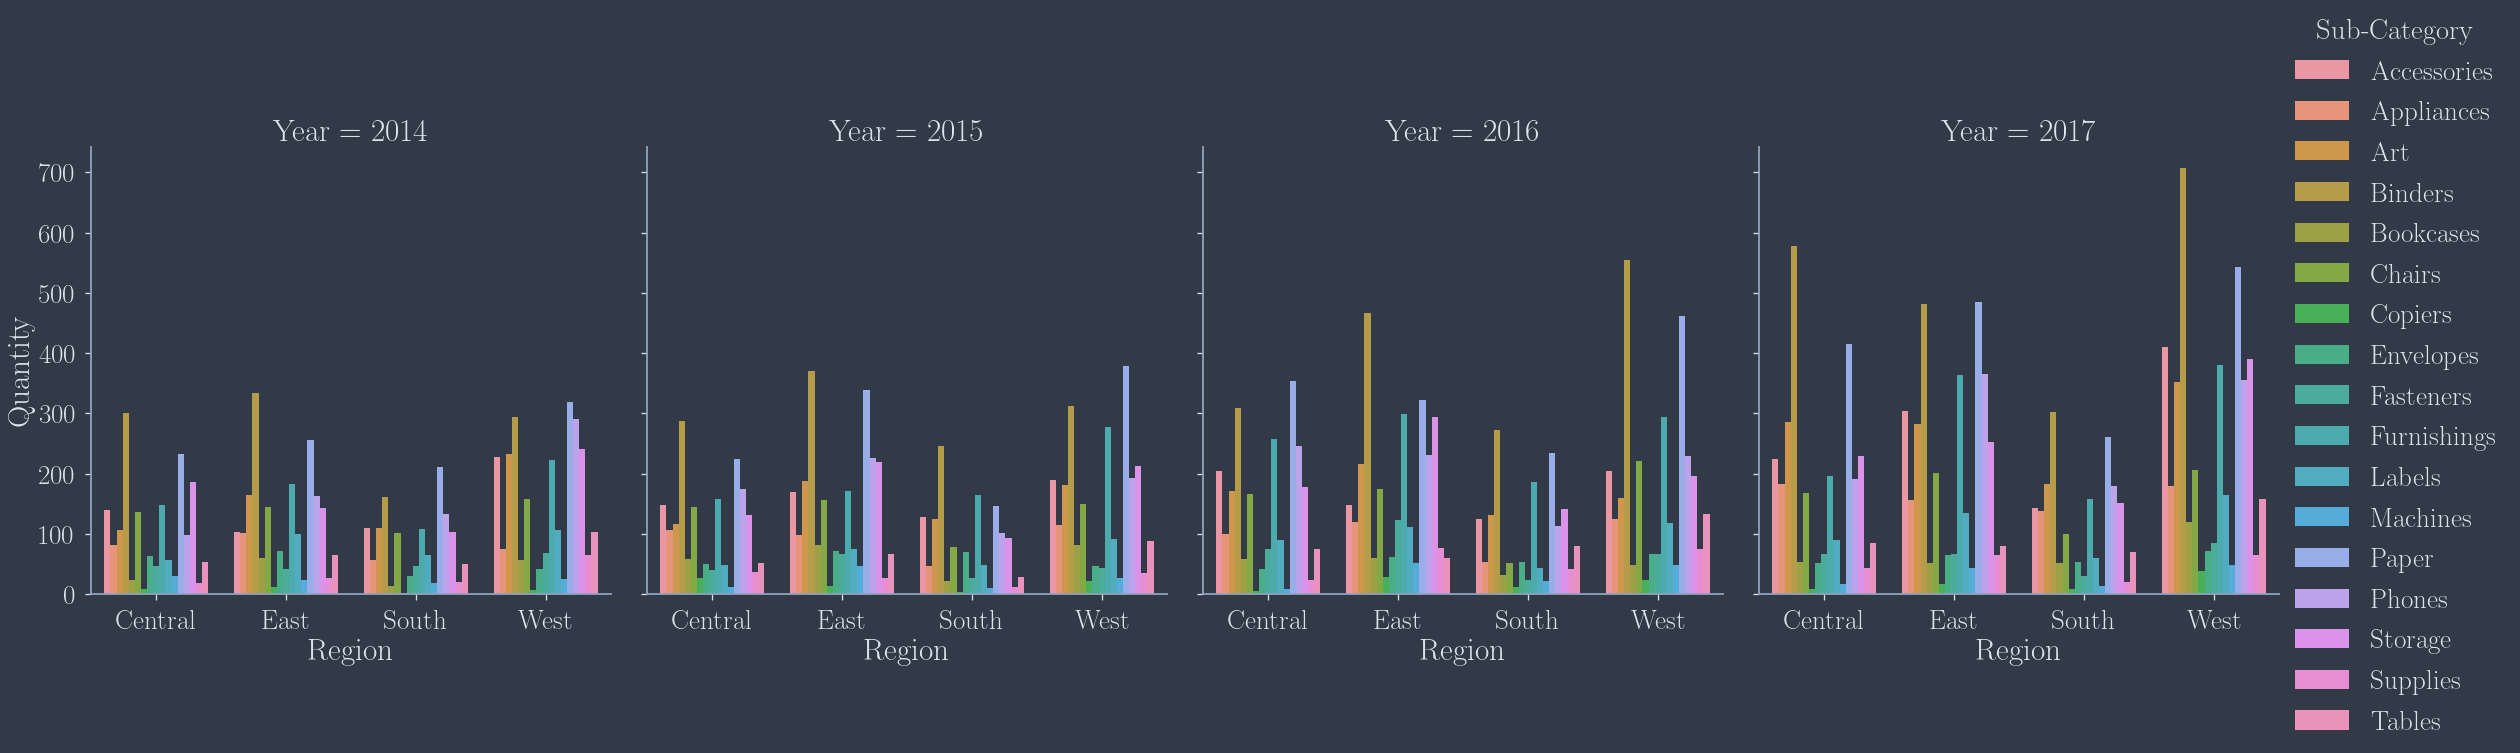

In [10]:
df_peryear = pd.DataFrame(df.groupby(['Year','Region','Sub-Category'])['Quantity', 'Sales','Profit'].sum()).reset_index()
g = sns.catplot(x='Region',y='Quantity',hue='Sub-Category', col='Year',data = df_peryear,
                kind='bar', height=8,aspect=1);

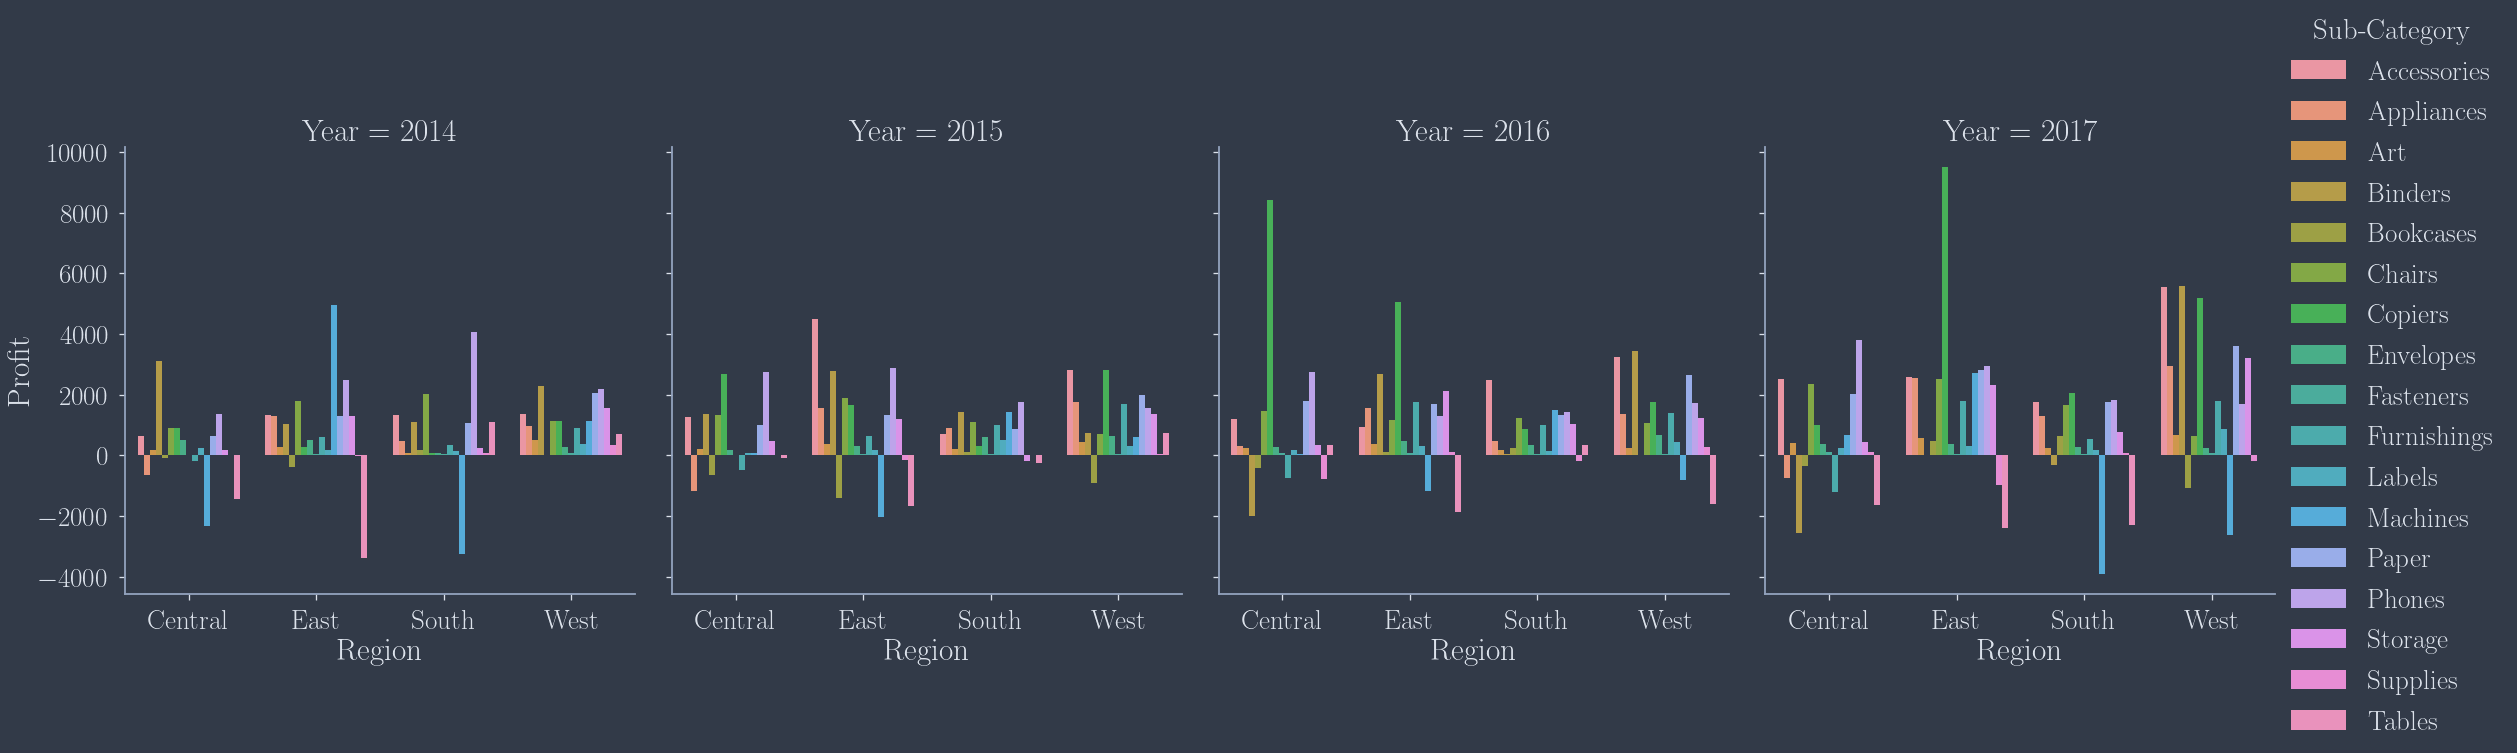

In [11]:
g = sns.catplot(x='Region',y='Profit',hue='Sub-Category', col='Year',data = df_peryear,
                kind='bar', height=8,aspect=1);

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df2 = df.groupby(['Region','Sub-Category']).resample('3M').sum().reset_index()
df2 = df2[(df2['Sub-Category'] == 'Copiers')|
          (df2['Sub-Category'] == 'Supplies')|
          (df2['Sub-Category'] == 'Machines')|
          (df2['Sub-Category'] == 'Bookcases')|
          (df2['Sub-Category'] == 'Tables')|
          (df2['Sub-Category'] == 'Appliances')
         ]

<Figure size 3000x2250 with 0 Axes>

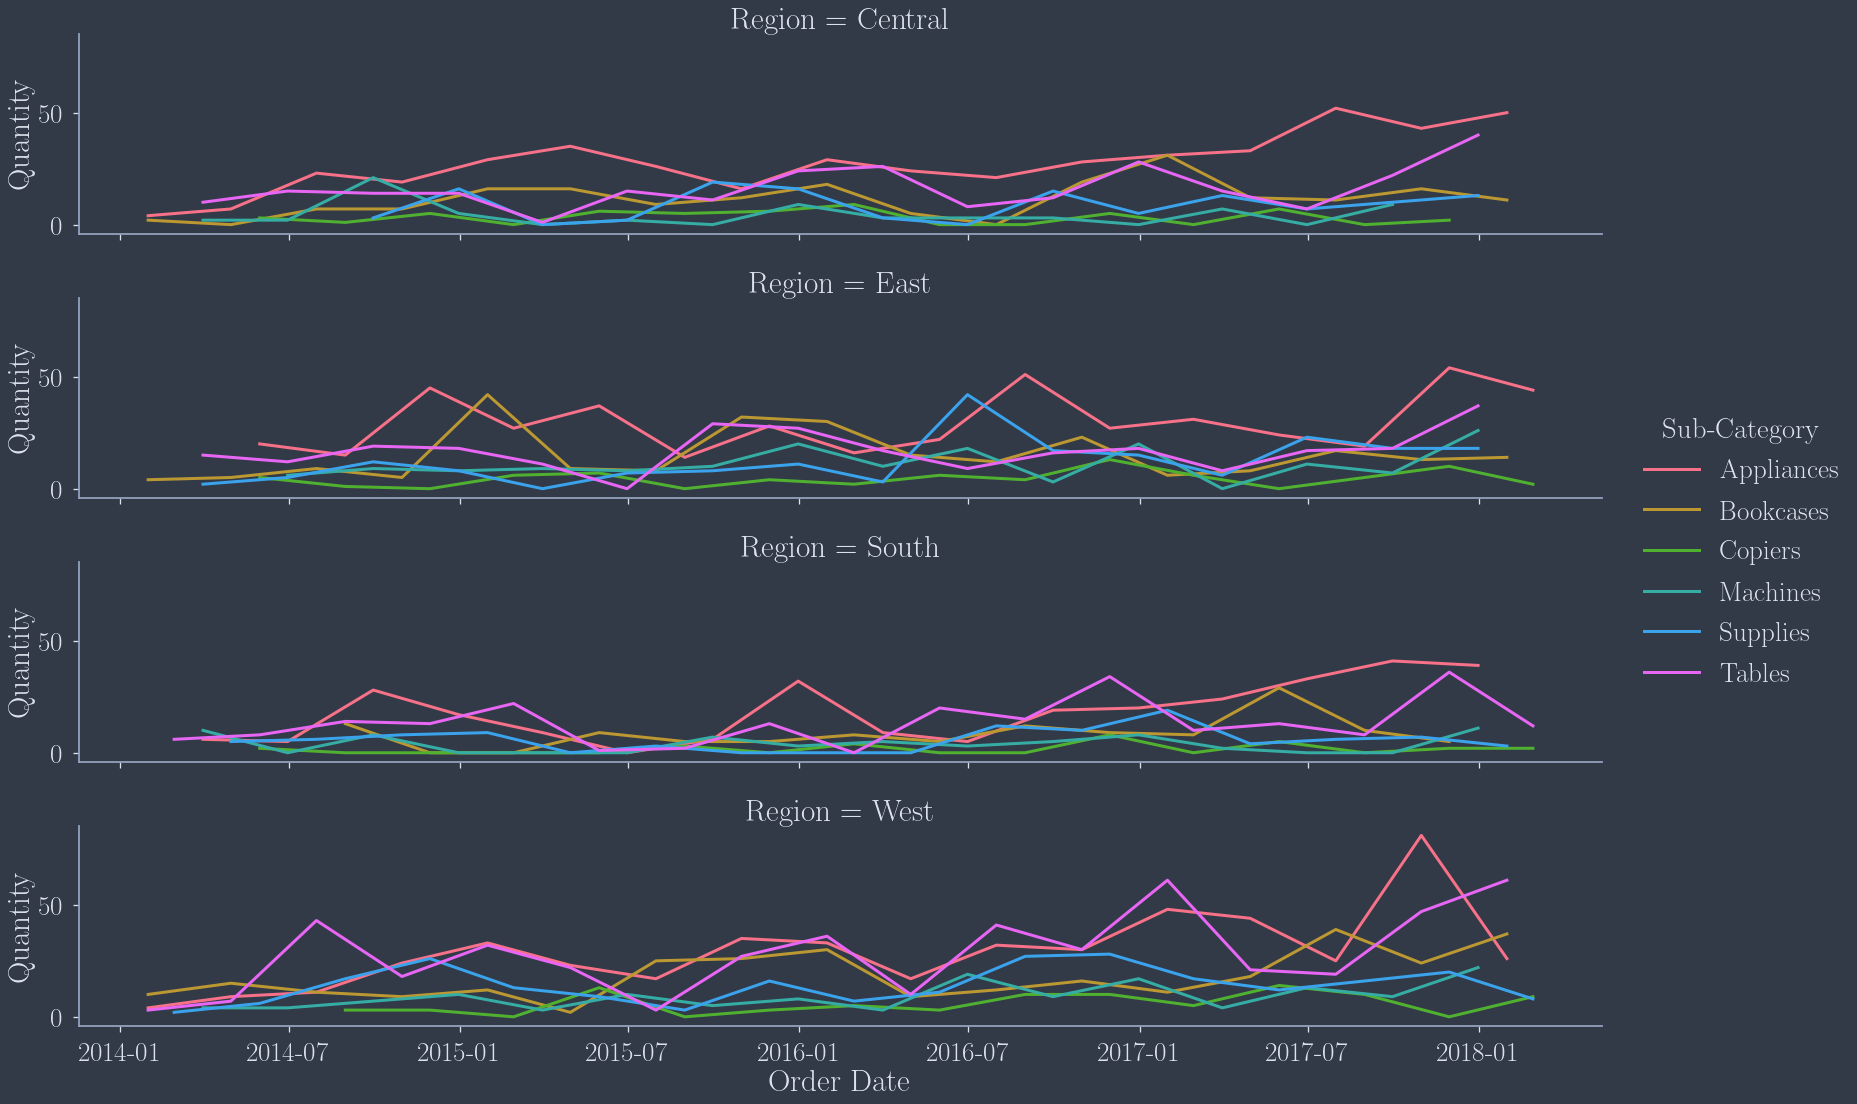

In [13]:
plt.figure(figsize=(20,15), dpi=150)
g = sns.FacetGrid(df2, row='Region', hue='Sub-Category', aspect=5, height = 4)
g = g.map(sns.lineplot, 'Order Date', 'Quantity').add_legend(loc='center left', bbox_to_anchor=(1, 0.5), borderaxespad=0)
plt.tight_layout()
plt.savefig('ts-Quantity')

<Figure size 748.8x655.2 with 0 Axes>

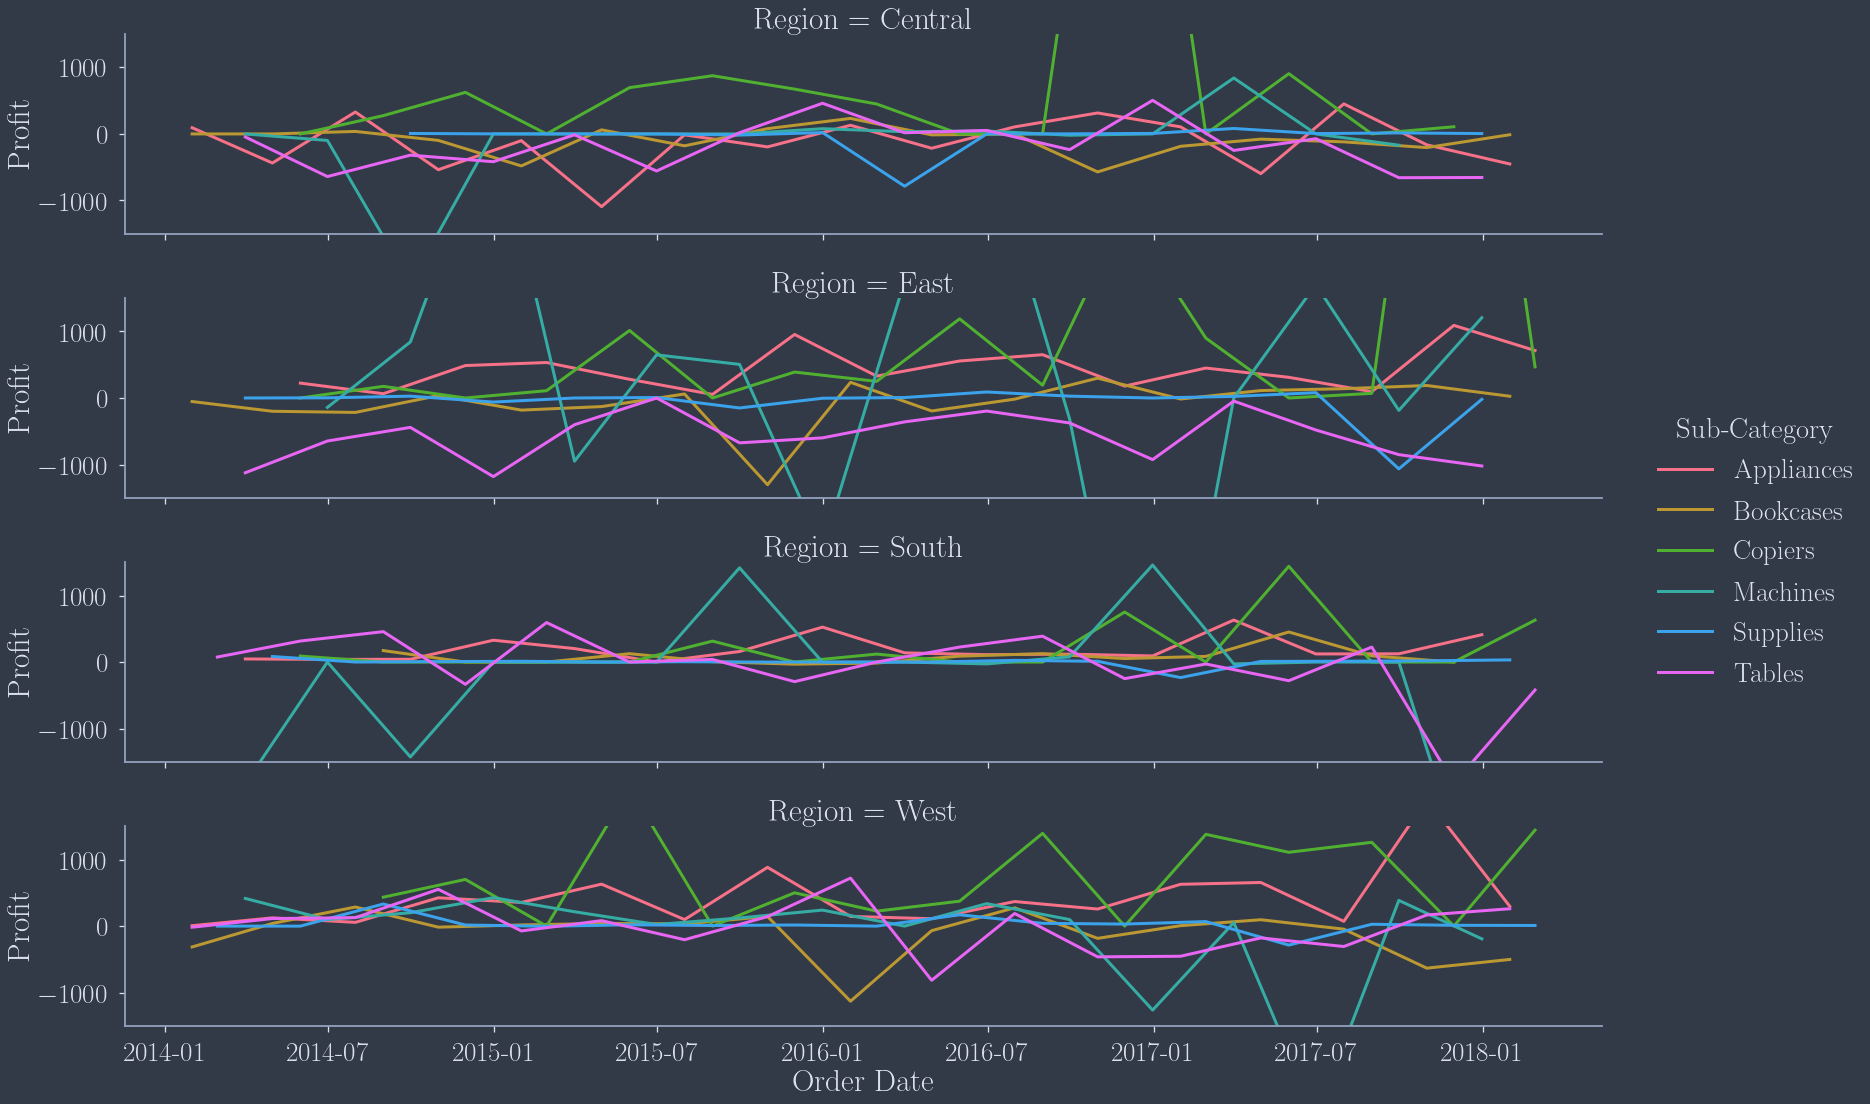

In [14]:
fig = plt.gcf()
g = sns.FacetGrid(df2, row='Region', hue='Sub-Category', aspect=5, height = 4)
g = g.map(sns.lineplot, 'Order Date', 'Profit').add_legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(-1500,1500)
plt.tight_layout()
plt.savefig('ts-Profit')

<Figure size 748.8x655.2 with 0 Axes>

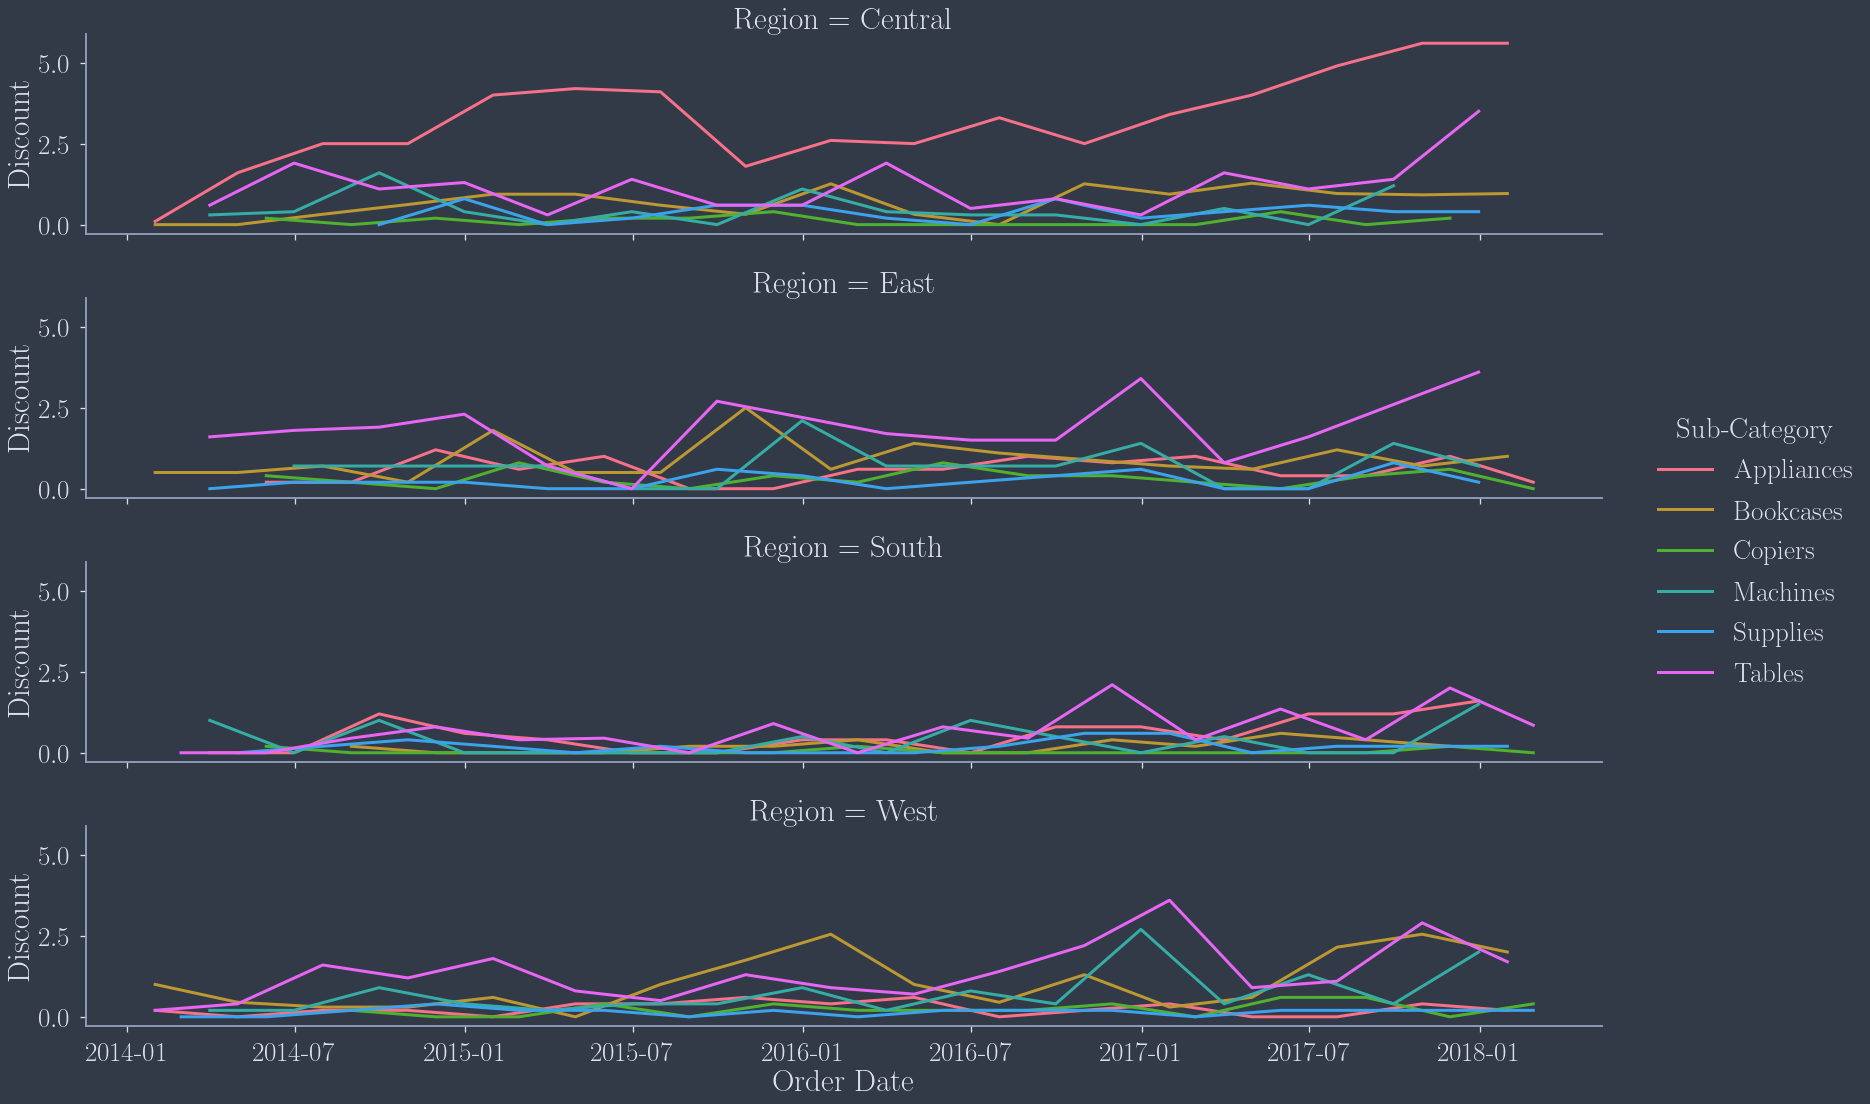

In [15]:
fig = plt.gcf()
g = sns.FacetGrid(df2, row='Region', hue='Sub-Category', aspect=5, height = 4)
g = g.map(sns.lineplot, 'Order Date', 'Discount').add_legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig('ts-Discount')